# Tf-idf - TERM FREQUENCY–INVERSE DOCUMENT FREQUENCY

Term frequency-inverse document frequency is a numerical statistic used to indicate how important a word is to each document in a collection of documents, or a corpus.

When applying tf-idf to a corpus, each word is given a tf-idf score for each document, representing the relevance of that word to the particular document. A higher tf-idf score indicates a term is more important to the corresponding document.

Tf-idf relies on two different metrics in order to come up with an overall score:

- term frequency, or how often a word appears in a document. This is the same as bag-of-words’ word count.
- inverse document frequency, which is a measure of how often a word appears in the overall corpus. By penalizing the score of words that appear throughout a corpus, tf-idf can give better insight into how important a word is to a particular document of a corpus.

See example term document matrix below

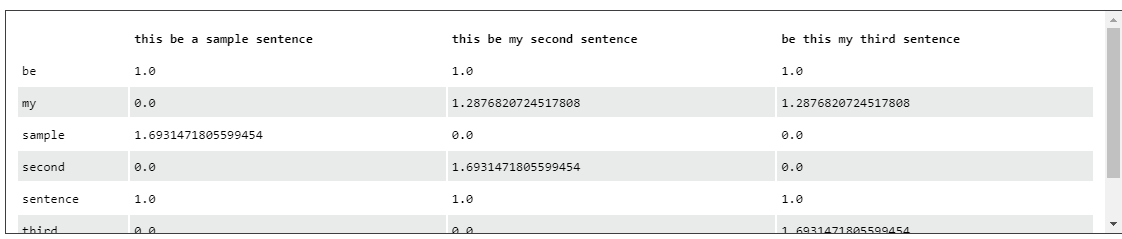

## Frequency

Term frequency indicates how often each workl appears in the document.  Term frequency can be calculated in Python using scikit-learn’s CountVectorizer, as shown below:

- A CountVectorizer object is initialized
- The CountVectorizer object is fit (trained) and transformed (applied) on the corpus of data, returning the term frequencies for each term-document pair

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

stanza = '''I'm nobody! Who are you?
Are you nobody, too?
Then there's a pair of us — don't tell!
They'd banish us, you know.'''


vectorizer = CountVectorizer()

term_frequencies = vectorizer.fit_transform([stanza])

## Inverse document frequency

The inverse document frequency component of the tf-idf score penalizes terms that appear more frequently across a corpus. The intuition is that words that appear more frequently in the corpus give less insight into the topic or meaning of an individual document, and should thus be deprioritized.

Inverse document frequency can be calculated on a group of documents using scikit-learn’s TfidfTransformer:

- a TfidfTransformer object is initialized. Don’t worry about the norm=None keyword argument for now, we will dig into this in the next exercise
- the TfidfTransformer is fit (trained) on a term-document matrix of term frequencies
- the .idf_ attribute of the TfidfTransformer stores the inverse document frequencies of the terms as a NumPy array

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(norm=None)
transformer.fit(term_frequencies)
inverse_doc_frequency = transformer.idf_

## preprocessing file needed to make this work

In [3]:
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  pos_counts = Counter()
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

def preprocess_text(text):
  cleaned = re.sub(r'\W+', ' ', text).lower()
  tokenized = word_tokenize(cleaned)
  normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
  return normalized

poem_1 = '''
Success is counted sweetest
By those who ne'er succeed.
To comprehend a nectar
Requires sorest need.

Not one of all the purple host
Who took the flag to-day
Can tell the definition,
So clear, of victory,

As he, defeated, dying,
On whose forbidden ear
The distant strains of triumph
Break, agonized and clear!'''

poem_2 = '''
Wild nights! Wild nights!
Were I with thee,
Wild nights should be
Our luxury!

Futile the winds
To a heart in port, —
Done with the compass,
Done with the chart.

Rowing in Eden!
Ah! the sea!
Might I but moor
To-night in thee!'''

poem_3 = '''
I'm nobody! Who are you?
Are you nobody, too?
Then there 's a pair of us — don't tell!
They 'd banish us, you know.

How dreary to be somebody!
How public, like a frog
To tell your name the livelong day
To an admiring bog!'''

poem_4 = '''
I felt a funeral in my brain,
   And mourners, to and fro,
Kept treading, treading, till it seemed
   That sense was breaking through.

And when they all were seated,
   A service like a drum
Kept beating, beating, till I thought
   My mind was going numb.

And then I heard them lift a box,
   And creak across my soul
With those same boots of lead, again.
   Then space began to toll

As all the heavens were a bell,
   And Being but an ear,
And I and silence some strange race,
   Wrecked, solitary, here.'''

poem_5 = '''
Hope is the thing with feathers
That perches in the soul,
And sings the tune without the words,
And never stops at all,

And sweetest in the gale is heard;
And sore must be the storm
That could abash the little bird
That kept so many warm.

I 've heard it in the chillest land,
And on the strangest sea;
Yet, never, in extremity,
It asked a crumb of me.'''

poem_6 = '''
The pedigree of honey
Does not concern the bee;
A clover, any time, to him
Is aristocracy.'''

poems = [poem_1, poem_2, poem_3, poem_4, poem_5, poem_6]

# Using skicki

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocess documents
processed_poems = [preprocess_text(poem) for poem in poems]

# initialize and fit TfidfVectorizer
# a TfidfVectorizer object is initialized. The norm=None keyword argument prevents scikit-learn from modifying the multiplication of term frequency and inverse document frequency
vectorizer = TfidfVectorizer(norm=None)

# the TfidfVectorizer object is fit and transformed on the corpus of data, returning the tf-idf scores for each term-document pair
tfidf_scores = vectorizer.fit_transform(processed_poems)


# get vocabulary of terms
feature_names = vectorizer.get_feature_names_out()

# get corpus index
corpus_index = [f"Poem {i+1}" for i in range(len(poems))]

# create pandas DataFrame with tf-idf scores
try:
  df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=corpus_index)
  print(df_tf_idf)
except:
  pass

           Poem 1  Poem 2    Poem 3    Poem 4    Poem 5  Poem 6
abash    0.000000     0.0  0.000000  0.000000  2.252763     0.0
across   0.000000     0.0  0.000000  2.252763  0.000000     0.0
admire   0.000000     0.0  2.252763  0.000000  0.000000     0.0
again    0.000000     0.0  0.000000  2.252763  0.000000     0.0
agonize  2.252763     0.0  0.000000  0.000000  0.000000     0.0
...           ...     ...       ...       ...       ...     ...
word     0.000000     0.0  0.000000  0.000000  2.252763     0.0
wreck    0.000000     0.0  0.000000  2.252763  0.000000     0.0
yet      0.000000     0.0  0.000000  0.000000  2.252763     0.0
you      0.000000     0.0  6.758289  0.000000  0.000000     0.0
your     0.000000     0.0  2.252763  0.000000  0.000000     0.0

[173 rows x 6 columns]


## Convert bag of words to tf-idf

In [5]:
# Scikit-learn’s TfidfTransformer is up to the task of converting your bag-of-words model to tf-idf. You begin by initializing a TfidfTransformer object.
tf_idf_transformer = TfidfTransformer(norm=False)

# Given a bag-of-words matrix count_matrix, you can now multiply the term frequencies by their inverse document frequency to get the tf-idf scores as follows:
tf_idf_scores = tfidf_transformer.fit_transform(count_matrix)


NameError: name 'tfidf_transformer' is not defined